# Fast mnist training

**(Actually second approach)**

**Little, handy notebook prepared for fitting a model to mnist dataset**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
data = keras.datasets.mnist.load_data()

In [3]:
train_data, test_data = data

In [4]:
X_train_full, y_train_full = train_data
X_test, y_test = test_data

In [5]:
print(f"{X_train_full.shape = }")
print(f"{y_train_full.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train_full.shape = (60000, 28, 28)
y_train_full.shape = (60000,)
X_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [6]:
X_train_full = X_train_full / 255.
X_test = X_test / 255.

In [7]:
def print_random_digit(X=X_train_full, y=y_train_full, figsize=(3.5, 3.5)):
    idx = np.random.randint(X.shape[0])
    digit, label = X[idx], y[idx]
    
    plt.figure(figsize=figsize)
    plt.imshow(digit, cmap='binary', interpolation='nearest')
    plt.title(label)

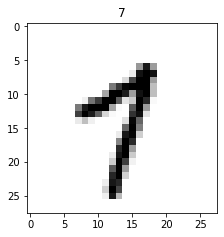

In [8]:
print_random_digit()

Preparing the dataset to training. Maybe training on smaller portion of images could lead into reasonable results.

In [9]:
#X_train, X_val = X_train_full[:55000], X_train_full[55000:]
#y_train, y_val = y_train_full[:55000], y_train_full[55000:]

X_train, X_val = X_train_full[:1500], X_train_full[1500:2000]
y_train, y_val = y_train_full[:1500], y_train_full[1500:2000]
X_test = X_test
y_test = y_test

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
], name='model')

In [11]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_model.h5', monitor='val_accuracy', save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [13]:
%%time
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint_cb, early_stop_cb])

Epoch 1/50
47/47 [==============================] - 1s 18ms/step - loss: 0.9376 - accuracy: 0.7100 - val_loss: 0.4180 - val_accuracy: 0.8680
Epoch 2/50
47/47 [==============================] - 1s 11ms/step - loss: 0.3796 - accuracy: 0.8873 - val_loss: 0.3985 - val_accuracy: 0.8880
Epoch 3/50
47/47 [==============================] - 1s 11ms/step - loss: 0.2448 - accuracy: 0.9280 - val_loss: 0.2955 - val_accuracy: 0.9140
Epoch 4/50
47/47 [==============================] - 1s 11ms/step - loss: 0.1688 - accuracy: 0.9527 - val_loss: 0.3640 - val_accuracy: 0.9020
Epoch 5/50
47/47 [==============================] - 0s 10ms/step - loss: 0.1249 - accuracy: 0.9633 - val_loss: 0.4013 - val_accuracy: 0.8820
Epoch 6/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0610 - accuracy: 0.9827 - val_loss: 0.2912 - val_accuracy: 0.9260
Epoch 7/50
47/47 [==============================] - 1s 11ms/step - loss: 0.0404 - accuracy: 0.9927 - val_loss: 0.3589 - val_accuracy: 0.9060
Epoch 8/50
47

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4726 - accuracy: 0.9131


[0.4726315438747406, 0.913100004196167]

### Place for dummy comments...

\*click\*, noice!

Although only 1400 images has been used during training, the model performs *well*.

In [15]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 954,    0,    4,    1,    1,    2,    5,    5,    7,    1],
       [   0, 1112,    6,    2,    0,    1,    1,    3,   10,    0],
       [  10,    0,  958,   11,   12,    0,    6,   19,   15,    1],
       [   0,    1,   49,  869,    2,   37,    2,   19,   21,   10],
       [   1,    3,    3,    0,  891,    1,   10,   10,   11,   52],
       [  16,    2,    4,   28,   12,  758,   11,   14,   41,    6],
       [  22,    3,   29,    0,   14,   21,  856,    2,   11,    0],
       [   1,    8,   22,    6,    2,    1,    0,  973,    1,   14],
       [   9,    2,   22,   18,   13,   11,    6,   21,  859,   13],
       [  13,    5,    1,   14,   23,    8,    0,   37,    7,  901]],
      dtype=int64)

In [18]:
conf_mat_errors = conf_mat - np.diag(conf_mat.diagonal())

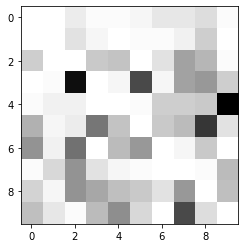

In [19]:
plt.imshow(conf_mat_errors, cmap='binary')

In [20]:
from skimage import color
from skimage import io

[0.    0.    0.    0.867 0.    0.    0.    0.096 0.    0.037]


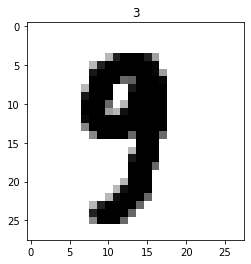

In [21]:
my_digit = 1.0 - color.rgb2gray(io.imread('digit.png'))

plt.imshow(my_digit, cmap='binary')

predictions = model.predict(my_digit[np.newaxis, :, :])
digit = np.argmax(model.predict(my_digit[np.newaxis, :, :]), axis=-1)

with np.printoptions(precision=3, suppress=True):
    print(predictions[0])
    plt.title(digit[0])